In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


In [2]:
# load in the merged frames
ya = pd.read_csv(r'D:\Programming\LHL-data-notes\Final\data\youngadult_merged.csv')
rom = pd.read_csv(r'D:\Programming\LHL-data-notes\Final\data\romance_merged.csv')

In [3]:
ya.head()

,Unnamed: 0,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,...,original_publication_year,original_title,rating_dist,default_chaptering_book_id,original_publication_day,original_language_id,ratings_count,media_type,ratings_sum,work_id
0,0,8842281e1d1347389f2ab93d60773d4d,2767052,248c011811e945eca861b5c31a549291,5,I cracked and finally picked this up. Very enj...,Wed Jan 13 13:38:25 -0800 2010,Wed Mar 22 11:46:36 -0700 2017,Sun Mar 25 00:00:00 -0700 2012,Fri Mar 23 00:00:00 -0700 2012,...,2008.0,The Hunger Games,5:2768578|4:1519190|3:577431|2:132128|1:69269|...,6053292.0,14.0,NaN,5066596.0,book,21985468.0,2792775.0
1,1,7504b2aee1ecb5b2872d3da381c6c91e,23302416,84c0936a0f9868f38e75d2f9a5cb761e,5,I read this book because my fifth grade son wa...,Wed Jan 21 18:40:59 -0800 2015,Wed Oct 26 03:44:13 -0700 2016,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,f8a89075dc6de14857561522e729f82c,18053080,785c8db878f4009da9741dea51f641da,4,Though the book started out slow and only star...,Sat Jan 11 17:58:41 -0800 2014,Tue Dec 02 11:43:07 -0800 2014,Sat Apr 12 00:00:00 -0700 2014,Fri Apr 11 00:00:00 -0700 2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,f8a89075dc6de14857561522e729f82c,17383543,34dc3c45d07e82718b05e73167259aef,2,"*Update - 10/27/13* - After some sleep, I thin...",Sun Apr 21 19:42:28 -0700 2013,Fri Aug 15 07:55:01 -0700 2014,Sat Oct 26 00:00:00 -0700 2013,Fri Oct 25 00:00:00 -0700 2013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,f8a89075dc6de14857561522e729f82c,16651458,d8d6b590780256fef7ae4a9550fe3e0d,5,"This is a moving, heartbreaking, view into a l...",Fri Jan 11 11:42:42 -0800 2013,Fri Mar 01 09:31:01 -0800 2013,Mon Jan 14 00:00:00 -0800 2013,Sat Jan 12 00:00:00 -0800 2013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# initial column drop of mostly user data and single value columns
ya.drop(['Unnamed: 0',
'user_id',
'review_id', 
'read_at',
'started_at',
'n_votes',
'n_comments',
'books_count',
'default_description_language_code',
'default_chaptering_book_id',
'original_language_id', 
'media_type'], axis=1, inplace=True)


In [5]:
rom.drop(['Unnamed: 0',
'user_id',
'review_id', 
'read_at',
'started_at',
'n_votes',
'n_comments',
'books_count',
'default_description_language_code',
'default_chaptering_book_id',
'original_language_id', 
'media_type'], axis=1, inplace=True)

In [6]:
rom.head()

,book_id,rating,review_text,date_added,date_updated,reviews_count,original_publication_month,text_reviews_count,original_publication_year,original_title,rating_dist,original_publication_day,ratings_count,ratings_sum,work_id
0,1893,5,** spoiler alert ** \n So the other day Elizab...,Tue Oct 10 19:08:05 -0700 2006,Sun Feb 19 02:04:48 -0800 2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17939501,5,"It is very hard to believe this is all true, b...",Fri Nov 08 20:17:30 -0800 2013,Fri Nov 08 20:22:59 -0800 2013,1361.0,8.0,49.0,2012.0,NaN,5:111|4:126|3:109|2:60|1:35|total:441,12.0,441.0,1541.0,21796956.0
2,15706923,2,Ehhhhhh. \n Really nothing to rave about. It w...,Fri Nov 08 20:14:53 -0800 2013,Fri Nov 08 20:16:50 -0800 2013,112.0,5.0,16.0,2012.0,Bloodwine,5:11|4:13|3:13|2:10|1:5|total:52,6.0,52.0,171.0,21370904.0
3,7840190,4,Enjoyable read! I liked that Connie is not a t...,Fri Nov 08 19:57:47 -0800 2013,Fri Nov 08 20:01:41 -0800 2013,7664.0,1.0,280.0,2010.0,NaN,5:982|4:1196|3:963|2:293|1:173|total:3607,1.0,3607.0,13342.0,21509416.0
4,15463724,4,There are definitely too many books lately wit...,Wed Oct 30 11:19:32 -0700 2013,Wed Oct 30 11:20:53 -0700 2013,109.0,6.0,8.0,2012.0,NaN,5:7|4:13|3:7|2:1|1:3|total:31,6.0,31.0,113.0,21120084.0


In [7]:
rom.isnull().sum()

book_id                             0
rating                              0
review_text                      3130
date_added                          0
date_updated                        0
reviews_count                  691745
original_publication_month    1108107
text_reviews_count             691745
original_publication_year      892531
original_title                2098328
rating_dist                    691745
original_publication_day      1184845
ratings_count                  691745
ratings_sum                    691745
work_id                        691745
dtype: int64

In [8]:
ya.isnull().sum()

book_id                            0
rating                             0
review_text                     1279
date_added                         0
date_updated                       0
reviews_count                 487782
original_publication_month    596886
text_reviews_count            487782
original_publication_year     505542
original_title                775240
rating_dist                   487782
original_publication_day      630171
ratings_count                 487782
ratings_sum                   487782
work_id                       487782
dtype: int64

In [9]:
# Since I am interested in review text I drop any rows where there is no review text
rom = rom.dropna(subset = ['review_text'])
ya = ya.dropna(subset = ['review_text'])

In [11]:
# Since I am interested in a longitudinal study of review sentiment, I drop any rows where the year and month
# of publication is unavailable.
rom = rom.dropna(subset = ['original_publication_year'])
ya = ya.dropna(subset = ['original_publication_year'])

In [10]:
rom = rom.dropna(subset = ['original_publication_month'])
ya = ya.dropna(subset = ['original_publication_month'])

In [12]:
rom.isnull().sum()

book_id                             0
rating                              0
review_text                         0
date_added                          0
date_updated                        0
reviews_count                       0
original_publication_month          0
text_reviews_count                  0
original_publication_year           0
original_title                1186088
rating_dist                         0
original_publication_day        76616
ratings_count                       0
ratings_sum                         0
work_id                             0
dtype: int64

In [13]:
ya.isnull().sum()

book_id                            0
rating                             0
review_text                        0
date_added                         0
date_updated                       0
reviews_count                      0
original_publication_month         0
text_reviews_count                 0
original_publication_year          0
original_title                264679
rating_dist                        0
original_publication_day       33202
ratings_count                      0
ratings_sum                        0
work_id                            0
dtype: int64

In [14]:
# I decide to combine these dataframes to macximize my data
combined = pd.concat([ya, rom])

In [17]:
combined.shape

(4246811, 15)

In [18]:
# I decide to use the last updated date as my measure for when the sentiment was given. Reviews can be updated after
# the initial posting. I assumed that the sentiments would most accurately reflect the time of update even if the
# initial review was given earlier.

# I extracted the month and the year of the review date
combined['rev_year'] = combined['date_updated'].str.slice(-4,)
combined['rev_month'] = combined['date_updated'].str.slice(4,7)

In [19]:
combined.head()

,book_id,rating,review_text,date_added,date_updated,reviews_count,original_publication_month,text_reviews_count,original_publication_year,original_title,rating_dist,original_publication_day,ratings_count,ratings_sum,work_id,rev_year,rev_month
0,2767052,5,I cracked and finally picked this up. Very enj...,Wed Jan 13 13:38:25 -0800 2010,Wed Mar 22 11:46:36 -0700 2017,6057595.0,9.0,156575.0,2008.0,The Hunger Games,5:2768578|4:1519190|3:577431|2:132128|1:69269|...,14.0,5066596.0,21985468.0,2792775.0,2017,Mar
6,7260188,5,What a great ending to the trilogy!! The secon...,Fri Jul 20 14:00:41 -0700 2012,Sun Aug 23 20:49:02 -0700 2015,2397181.0,8.0,96736.0,2010.0,Mockingjay,5:749202|4:627098|3:378562|2:112136|1:30653|to...,24.0,1897651.0,7645013.0,8812783.0,2015,Aug
7,6148028,5,LOVED IT!!,Fri Jul 20 14:00:39 -0700 2012,Sun Aug 23 20:49:06 -0700 2015,2505702.0,9.0,89071.0,2009.0,Catching Fire,5:992769|4:696715|3:265971|2:48866|1:10703|tot...,NaN,2015024.0,8657053.0,6171458.0,2015,Aug
8,2767052,5,"Exciting, fun, entertaining! :)",Fri Jul 20 13:59:12 -0700 2012,Sun Aug 23 20:49:13 -0700 2015,6057595.0,9.0,156575.0,2008.0,The Hunger Games,5:2768578|4:1519190|3:577431|2:132128|1:69269|...,14.0,5066596.0,21985468.0,2792775.0,2015,Aug
9,13206828,5,LET'S JUST SAY I AM SO THANKFUL I HAVE THE NEX...,Sat Sep 23 08:39:21 -0700 2017,Sat Sep 30 11:30:46 -0700 2017,332626.0,2.0,20635.0,2014.0,Cress,5:108214|4:59427|3:15611|2:2179|1:910|total:18...,4.0,186341.0,830879.0,18390772.0,2017,Sep


In [20]:
months = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4,'May':5, 'Jun':6, 'Jul':7, 'Aug':8,'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

In [21]:
combined.rev_month = combined.rev_month.map(months)

In [22]:
combined.original_publication_month = combined.original_publication_month.astype(int)
combined.original_publication_year = combined.original_publication_year.astype(int)


In [51]:
# I then calculated the difference between the publication date and the review date in months
combined['month_diff'] = ((combined['rev_year'].astype(int) - combined['original_publication_year'].astype(int))*12) + (combined['rev_month'].astype(int) - combined['original_publication_month'].astype(int))

In [60]:
combined['month_diff'].max()

24434

In [ ]:
# I realised that some of the dates were entered incorrectly, and thus decided to drop any difference less than 0,
# as this implied that the review was posted before the book publication. As goodreads is not a site for prepublication
# reviews, this should not exclude correct entries
combined.drop(combined[combined['month_diff'] < 0].index, inplace = True)

In [56]:
toy = combined.head(10)

In [70]:
# I then added a column that give a binned time difference - 
# up to 3 months, 6 months, one year, two years, 5 years, and 10 years after publication
# I am not interested in any sentiments given more than 10 years after the publication of a book
bin_distance=[0,3,6,12,24,60,120,24434]
catg_distance=[0.25,0.5,1,2,5,120,200]
combined['time_cat']=pd.cut(combined.month_diff, bin_distance, labels=catg_distance)

In [71]:
combined.tail(10)

,book_id,rating,review_text,date_added,date_updated,reviews_count,original_publication_month,text_reviews_count,original_publication_year,original_title,rating_dist,original_publication_day,ratings_count,ratings_sum,work_id,rev_year,rev_month,month_diff,time_cat
3565362,8662836,5,This book was absolutely my favorite in the se...,Thu Jun 07 13:23:37 -0700 2012,Thu Jun 07 13:25:16 -0700 2012,91827.0,8,2704.0,2011,Chain Reaction,5:23469|4:15047|3:9144|2:2527|1:1105|total:51292,1.0,51292.0,211124.0,13534308.0,2012,6,10,1.00
3565363,4268157,5,Amazing beginning to the Perfect Chemistry ser...,Thu Jun 07 13:22:13 -0700 2012,Thu Jun 07 13:23:20 -0700 2012,432222.0,12,9990.0,2008,Perfect Chemistry,5:95085|4:58342|3:36468|2:12239|1:6538|total:2...,23.0,208672.0,849213.0,4315675.0,2012,6,42,5.00
3565364,6280118,0,The Hollywood-ready latest from Nicholls (The ...,Wed Feb 16 18:03:09 -0800 2011,Sat Jul 09 17:41:53 -0700 2011,390941.0,6,16074.0,2009,One Day,5:71422|4:87844|3:60531|2:21500|1:8691|total:2...,11.0,249988.0,941770.0,6463667.0,2011,7,25,5.00
3565367,17384592,5,I recently read Trapped by Irene Hannon. It re...,Mon Nov 04 08:18:25 -0800 2013,Mon Nov 04 08:20:33 -0800 2013,4691.0,1,270.0,2013,Trapped,5:1216|4:875|3:357|2:82|1:26|total:2556,1.0,2556.0,10841.0,24192092.0,2013,11,10,1.00
3565368,18941335,5,A mysterious phone call from a little girl sen...,Fri Jun 28 11:55:40 -0700 2013,Fri Jul 11 15:07:44 -0700 2014,43.0,1,7.0,2011,NaN,5:9|4:9|3:4|2:0|1:0|total:22,1.0,22.0,93.0,19023983.0,2014,7,42,5.00
3565370,12963147,5,"In Love in Disguise, Carol Cox skillfully weav...",Fri Jun 28 11:45:12 -0700 2013,Fri Jun 28 11:45:33 -0700 2013,3136.0,2,182.0,2013,NaN,5:357|4:473|3:355|2:97|1:37|total:1319,22.0,1319.0,4973.0,18120891.0,2013,6,4,0.50
3565371,13263377,5,Double Exposure by Susan Sleeman is a well-tho...,Fri Jun 28 11:44:01 -0700 2013,Fri Jun 28 11:44:41 -0700 2013,475.0,1,52.0,2012,NaN,5:70|4:81|3:34|2:4|1:2|total:191,1.0,191.0,786.0,18464995.0,2013,6,17,2.00
3565373,13548195,5,"Catherine Miller, the heroine of the story is ...",Fri Jun 28 11:29:21 -0700 2013,Fri Jun 28 11:29:40 -0700 2013,584.0,1,35.0,2012,Navy SEAL Rescuer,5:111|4:93|3:60|2:21|1:2|total:287,1.0,287.0,1151.0,19113367.0,2013,6,17,2.00
3565374,13261268,5,Broken Trust by Sharon Dunn is a romantic susp...,Fri Jun 28 09:07:53 -0700 2013,Fri Jun 28 09:08:21 -0700 2013,149.0,1,21.0,2012,NaN,5:16|4:30|3:13|2:1|1:0|total:60,1.0,60.0,241.0,18462787.0,2013,6,17,2.00
3565375,16109790,4,The book will appeal to those who enjoy romanc...,Sun May 26 17:42:03 -0700 2013,Thu Jul 25 15:11:42 -0700 2013,2833.0,6,152.0,2013,Trouble in Store,5:247|4:342|3:226|2:48|1:11|total:874,1.0,874.0,3388.0,21924302.0,2013,7,1,0.25


AttributeError: module 'matplotlib' has no attribute 'show'

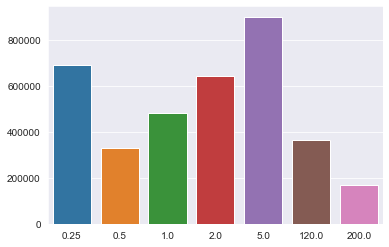

In [73]:
distanceBins = combined.time_cat.value_counts()
sns.set_style("darkgrid")
# plt.figure(figsize=(10,4))
sns.barplot(x=distanceBins.index, y=distanceBins.values)
plt.show()

c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Departure delays distribution')

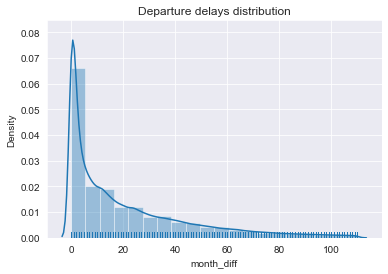

In [74]:
y = combined.month_diff
x = y[y.between(y.quantile(.05), y.quantile(.95))] # remove outliers outliers
sns.distplot(x, bins=20, rug=True).set_title('Time of Review distribution')

In [75]:
combined.head()

,book_id,rating,review_text,date_added,date_updated,reviews_count,original_publication_month,text_reviews_count,original_publication_year,original_title,rating_dist,original_publication_day,ratings_count,ratings_sum,work_id,rev_year,rev_month,month_diff,time_cat
0,2767052,5,I cracked and finally picked this up. Very enj...,Wed Jan 13 13:38:25 -0800 2010,Wed Mar 22 11:46:36 -0700 2017,6057595.0,9,156575.0,2008,The Hunger Games,5:2768578|4:1519190|3:577431|2:132128|1:69269|...,14.0,5066596.0,21985468.0,2792775.0,2017,3,102,120.0
6,7260188,5,What a great ending to the trilogy!! The secon...,Fri Jul 20 14:00:41 -0700 2012,Sun Aug 23 20:49:02 -0700 2015,2397181.0,8,96736.0,2010,Mockingjay,5:749202|4:627098|3:378562|2:112136|1:30653|to...,24.0,1897651.0,7645013.0,8812783.0,2015,8,60,5.0
7,6148028,5,LOVED IT!!,Fri Jul 20 14:00:39 -0700 2012,Sun Aug 23 20:49:06 -0700 2015,2505702.0,9,89071.0,2009,Catching Fire,5:992769|4:696715|3:265971|2:48866|1:10703|tot...,NaN,2015024.0,8657053.0,6171458.0,2015,8,71,120.0
8,2767052,5,"Exciting, fun, entertaining! :)",Fri Jul 20 13:59:12 -0700 2012,Sun Aug 23 20:49:13 -0700 2015,6057595.0,9,156575.0,2008,The Hunger Games,5:2768578|4:1519190|3:577431|2:132128|1:69269|...,14.0,5066596.0,21985468.0,2792775.0,2015,8,83,120.0
9,13206828,5,LET'S JUST SAY I AM SO THANKFUL I HAVE THE NEX...,Sat Sep 23 08:39:21 -0700 2017,Sat Sep 30 11:30:46 -0700 2017,332626.0,2,20635.0,2014,Cress,5:108214|4:59427|3:15611|2:2179|1:910|total:18...,4.0,186341.0,830879.0,18390772.0,2017,9,43,5.0


In [76]:
combined.drop(['date_added','date_updated','reviews_count','ratings_sum','work_id'], axis=1, inplace=True)

In [77]:
combined.to_csv('data/cleaned.csv')